## Non-Constructable Change Problem

Given an array containing the all the coins you have, what is the smallest amount of change that you can NOT construct using those coins. 

For example if the list of coins is [1,2,5,9,9], then the smallest amount of change that you can not make with these coins is 4.

Write a function that gets the array as an input and then returns the smallest non-constructable change

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# First Solution

For this solution I simply construc all of the sub arrays of the given array and then go ever the list of all subarrays to see what is the smallest amount of change that I can not make using those coins

This solution is not a good solution since it is very suboptimal. And array of length $n$ has $2^n$ subarrays. So the time complexity of this algorithm scales exponentially.

In [207]:
## Very bad idea: let's calculate the sum of elements of every member of the power set and then
## find the minumum possibe sum that is not in the list of possible sums

def nonConstructibleChange(coins):
    ## Given the list of coins, I first need to construct its power set. Here in the language of list,
    ## the power set will be a list containing lists that each list is the subset of coins list.
    ## To properly construct the power set, I need to count from 0 to n^2-1 (n is the size of coins list)
    ## and then convert that into binary and based on the binary string decide if I need to include a 
    ## specific element in the set or not.
    ## for example if A = [a,b,c] n=3, then I need to count from 0 to 7 which will produce the following list of 
    ## binary numbers with the corresponding elements in the subset
    ## 000 --> []
    ## 001 --> [c]
    ## 010 --> [b]
    ## 011 --> [bc]
    ## 100 --> [a]
    ## 101 --> [a,c]
    ## 110 --> [a,b]
    ## 111 --> [a,b,c]
    
    powerSet = []
    n = len(coins)
    if n==0:
        return 1
    for num in range(2**n):
        subset = []
        maskList = [(num//2**(n-i-1))%2 for i in range(n)] ## for example [0,0,0,1]
        for ind, elem in enumerate(maskList):
            if elem == 0:
                continue
            else:
                subset.append(coins[ind])
        powerSet.append(subset)

    possibleSumsDict  = dict()
    ## I used dictionaries since it has lower time complexity to check if an element is in it
    for elem in powerSet:
        summedValue = sum(elem)
        possibleSumsDict[str(summedValue)] = summedValue
        
        
    for i in range(1,100):
        if str(i) in possibleSumsDict:
            continue
        else:
            return i



In [209]:
nonConstructibleChange([1,2,5,9,9])

4

# Second Solution

Since we are looking for the smallest non-constructable change, we have an extra bit of information which is the term "smallest". However, in the first solution, we did not utalize this extra bit of information and searched for the whole space of possible set arrays. 

Building the subarrays (or subsets) of an array (or a set) can be done in a systematic way. For an array of length $n$, simply count from $0$ to $2^n$ in a $n$ bit binary way and then decide about the presense of any specific element of the main array in the subarray based on the corresponding digit in the binary number. 

For example suppse that we want to write down all of the sub arrays of a = [1,2,3]. Since this array has length 2, we need to enumerate from 0 to 7 in 3 bit binary numbers:

$$ 000 \\ 001 \\ 010 \\ 011 \\ 100 \\ 101 \\ 110 \\ 111 $$

The first number $000$ represents a subarray that contains no elements of a. the ID $001$ represents a subarray that contains the first element of "a" but no second and third element of "a" (note that we can intrepret it vice versa: i.e. $001$ represents a subarray that contains that third element of "a" but not the first and second element). So we will have the following subarrays:

$$ 
000 \rightarrow []  \\
001 \rightarrow [1] \\
010 \rightarrow [2] \\
011 \rightarrow [2,1] \\
100 \rightarrow [3] \\
101 \rightarrow [3,1]\\
110 \rightarrow [3,2]\\
111 \rightarrow [3,2,1]
$$


Now look at the pattern and the order that these subarrays emerge in this systematic way. We start with a subarray with no element $$\mathcal{P} = \{[]\}$$. 
Then we pick the first element of original array and put it in the first subarray (while keeping the fist one) to have $$\mathcal{P} = \{[],[1]\}$$. 
Now we pick the second element in the original array and add it to all of previous sub arrays while keeping the previous ones. So the power set will be: $$\mathcal{P} = \{[],[1],[2],[2,1]\} $$
Similarly, we now pick the second element in the main array and do the similar process: $$\mathcal{P} = \{[],[1],[2],[2,1],[3],[3,1],[3,2],[3,2,1]\} $$

So if we sort the original array in the ascending way, then the sum of its subarrays will have a better behaviour:

$$ 
000 \rightarrow [] \xrightarrow{\Sigma} 0 \\
001 \rightarrow [1] \xrightarrow{\Sigma} 1  \\
010 \rightarrow [2] \xrightarrow{\Sigma} 2 \\
011 \rightarrow [2,1] \xrightarrow{\Sigma} 3  \\
100 \rightarrow [3] \xrightarrow{\Sigma} 3 \\
101 \rightarrow [3,1] \xrightarrow{\Sigma} 4 \\
110 \rightarrow [3,2] \xrightarrow{\Sigma} 5 \\
111 \rightarrow [3,2,1] \xrightarrow{\Sigma} 6 
$$

So this is how we construc the array containing the sumed value of subarrays. We start with array $\mathcal{S} = [0]$. Then pick the first element in the original array and add every elements of $\mathcal{S}$ with it and then put it in $\mathcal{S}$. So we will have: $$\mathcal{S} = [0,\underbrace{1}_{\text{1 + [0]}}]$$
With similar logic, we now pick the second element of the original array and repeat the operation described above. So we will have: $$\mathcal{S} = [0,1,\underbrace{2,3}_\text{2+[0,1]}]$$
And repeating the same thing with the third element we will have: $$\mathcal{S} = [0,1,2,3,\underbrace{3,4,5,6}_\text{3+[0,1,2,3]}]$$



So the second algorithm sorts the original array in a ascending form and then constructs the 

In [216]:
def nonConstructibleChange(coins):
    arr = coins
    arr.sort(reverse=False)
    
    possibleSums = [0]
    targetSum = 1
    index = 0
    missingSum=-1
    while index < len(arr):
        flag = 0
        candidateSums = []
        for presums in possibleSums:
            candidate = presums + arr[index]
            #print(targetSum,possibleSums,arr[index],candidate,flag)
            candidateSums.append(candidate)
            if candidate == targetSum:
                flag = 1
                targetSum += 1
        if flag == 0:
                missingSum = targetSum
                return missingSum
        possibleSums += candidateSums
        index += 1
        
    return possibleSums[-1]+1

In [217]:
nonConstructibleChange([1,2,5,9,9])

4

In [219]:
nonConstructibleChange([2,3,4])

1

### Plotting sum vs ID for subarrays of an ordered list and non ordered list

Question: Given array a of length n, plot the sum of elements of sub arrays vs the ID of subarray

In [72]:
def plotSumVsIndex(arr):
    n = len(arr)
    IDList = [[(j//(2**(n-i-1))%2) for i in range(n)] for j in range(2**n)]
    allSubArrays = []
    for id_ in IDList:
        subarray = []
        for i,elem in enumerate(id_):
            if elem == 1:
                subarray.append(arr[i])
        allSubArrays.append(subarray)



    sumOfSubArrays = []
    indexList = np.arange(0,2**n,1)
    for i in range(2**n):
        sumOfSubArrays.append(sum(allSubArrays[i]))
        
    fig = plt.figure(figsize=(10,6))
    plt.plot(indexList,sumOfSubArrays)
    plt.plot(indexList,sumOfSubArrays,"o")
    plt.grid("on")
    
    return allSubArrays, sumOfSubArrays
        
    

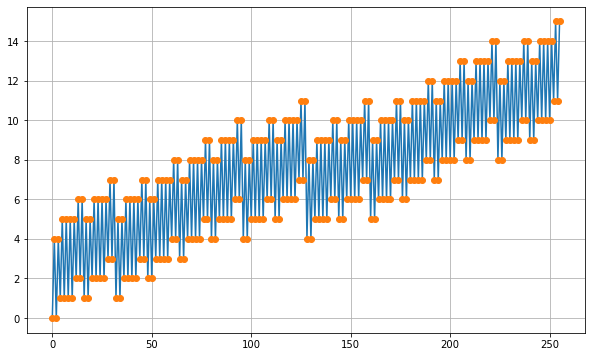

In [73]:
arr = [4,3,1,1,1,1,0,4]
subArrays,sumed = plotSumVsIndex(arr)

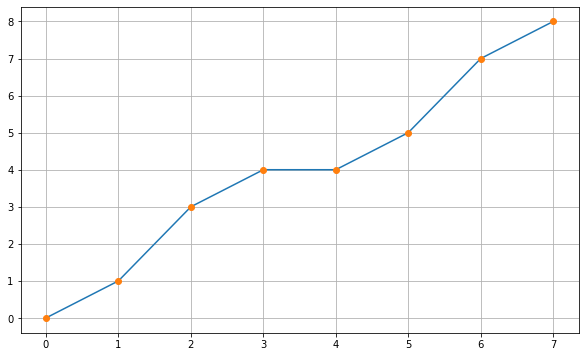

In [86]:
arr = [4,3,1]
arr.sort(reverse=True)
subArrays,summed = plotSumVsIndex(arr)

In [87]:
subArrays

[[], [1], [3], [3, 1], [4], [4, 1], [4, 3], [4, 3, 1]]

In [88]:
summed

[0, 1, 3, 4, 4, 5, 7, 8]

In [195]:
arr = [1,2,4,5]
arr.sort(reverse=False)

possibleSums = [0]

targetSum = 1
index = 0
missingSum=-1
while index < len(arr):
    flag = 0
    candidateSums = []
    for presums in possibleSums:
        candidate = presums + arr[index]
        #print(targetSum,possibleSums,arr[index],candidate,flag)
        candidateSums.append(candidate)
        if candidate == targetSum:
            flag = 1
            targetSum += 1
    if flag == 0:
            missingSum = targetSum
            break
    possibleSums += candidateSums

    index += 1
    
print(possibleSums[-1]+1)

13


In [196]:
possibleSums

[0, 1, 2, 3, 4, 5, 6, 7, 5, 6, 7, 8, 9, 10, 11, 12]

In [197]:
missingSum

-1